<a href="https://colab.research.google.com/github/krdeepak39/Deep-learning-model/blob/main/Resnet50_model_fine_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
path= 'drive/MyDrive/Colab Notebooks/Cat_Dog_horse_human_dataset/'

In [2]:
folders = os.listdir(path)

In [3]:
print(folders)

['cats', 'dogs', 'horses', 'humans']


In [4]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


In [5]:
img =image.load_img(path+'cats/cat.2.jpg')

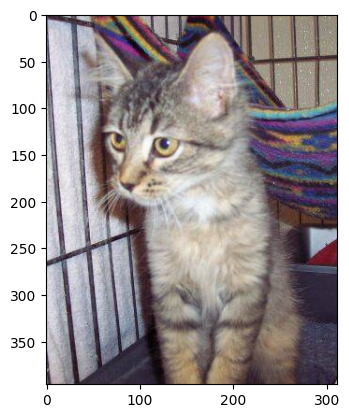

In [6]:
plt.imshow(img)

In [7]:
img = image.img_to_array(img)

In [8]:
img.shape

(396, 312, 3)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [10]:
train_set = ImageDataGenerator(        #augmentation
    rescale = 1/233,
    rotation_range =40,
    width_shift_range =0.2,
    height_shift_range=0.2,
    horizontal_flip=0.2,
    zoom_range=0.2
)
valid_set = ImageDataGenerator(rescale=1/255)

In [11]:
train_gen = train_set.flow_from_directory(
    path,
    target_size = (224,224),
    batch_size=100,
    class_mode= 'categorical'
)
valid_set = ImageDataGenerator(rescale = 1/255)

Found 734 images belonging to 4 classes.


In [12]:
i,j = next(train_gen)

In [13]:
i.shape

(100, 224, 224, 3)

In [14]:
j.shape

(100, 4)

[1. 0. 0. 0.]


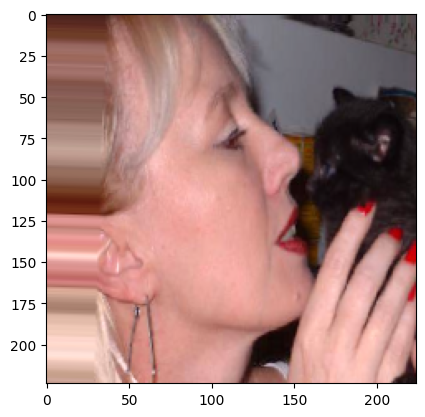

In [15]:
plt.imshow(i[75])
print(j[75])

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image


In [17]:
model_resnet =ResNet50(include_top= False)  #include_top to remove 2 layers

In [18]:
model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [19]:
for layer in model_resnet.layers:
  layer.trainable = False

In [20]:
import keras
output = model_resnet.output
output = keras.layers.GlobalAveragePooling2D()(output)
output = keras.layers.Dense(4, activation = 'softmax')(output)

In [21]:
overall_model = keras.Model(inputs= model_resnet.input, outputs = output)

In [22]:
overall_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [23]:
import tensorflow as tf
overall_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer= 'Adam', metrics='Accuracy')

In [24]:
val_path = 'drive/MyDrive/Colab Notebooks/Val_dataset/'

In [25]:
test_gen = valid_set.flow_from_directory(
        val_path,
        target_size = (224, 224)
)

Found 84 images belonging to 4 classes.


In [26]:
test_X, test_Y = next(test_gen)

In [27]:
overall_model.fit_generator(train_gen, epochs= 50, validation_data = (test_gen))

<ipython-input-27-c902d9dc8bba>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  overall_model.fit_generator(train_gen, epochs= 50, validation_data = (test_gen))


Epoch 1/50
8/8 [==============================] - 179s 22s/step - loss: 1.4094 - Accuracy: 0.2711 - val_loss: 1.3864 - val_Accuracy: 0.2500
Epoch 2/50
8/8 [==============================] - 191s 24s/step - loss: 1.3463 - Accuracy: 0.3147 - val_loss: 1.3292 - val_Accuracy: 0.3690
Epoch 3/50
8/8 [==============================] - 168s 21s/step - loss: 1.3163 - Accuracy: 0.3910 - val_loss: 1.3087 - val_Accuracy: 0.3929
Epoch 4/50
8/8 [==============================] - 174s 21s/step - loss: 1.3002 - Accuracy: 0.4046 - val_loss: 1.2953 - val_Accuracy: 0.3810
Epoch 5/50
8/8 [==============================] - 166s 20s/step - loss: 1.2904 - Accuracy: 0.4033 - val_loss: 1.2773 - val_Accuracy: 0.4167
Epoch 6/50
8/8 [==============================] - 172s 23s/step - loss: 1.2674 - Accuracy: 0.4074 - val_loss: 1.2683 - val_Accuracy: 0.4048
Epoch 7/50
8/8 [==============================] - 173s 21s/step - loss: 1.2640 - Accuracy: 0.4237 - val_loss: 1.2674 - val_Accuracy: 0.4167
Epoch 8/50
8/8 [====

In [31]:
overall_model.evaluate(test_gen)

3/3 [==============================] - 19s 7s/step - loss: 1.1328 - Accuracy: 0.5357


[1.132817029953003, 0.5357142686843872]

[0. 0. 0. 1.]
(224, 224, 3)
(1, 224, 224, 3)
1/1 [==============================] - 0s 298ms/step
[[0.13249044 0.30138877 0.21189222 0.3542286 ]] 3


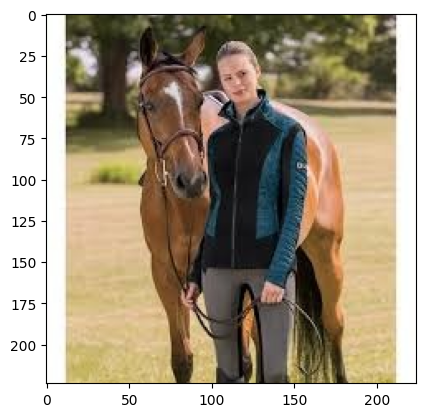

In [33]:
example = test_X[23]
print(test_Y[23])
plt.imshow(example)
print(example.shape)
import numpy as np

example = np.expand_dims(example, 0)

print(example.shape)
pred = overall_model.predict(example)
print(pred, np.argmax(pred))